## Amazon Dataset

### Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\AMZNtrain.csv",parse_dates=["Date"],index_col="Date")
train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [3]:
xtrain=train[["Open"]]

In [4]:
xtrain

,Open
Date,
2014-01-02,398.799988
2014-01-03,398.290009
2014-01-06,395.850006
2014-01-07,395.040009
2014-01-08,398.470001
...,...
2018-12-24,1346.000000
2018-12-26,1368.890015
2018-12-27,1454.199951


### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc_xtrain=sc.fit_transform(xtrain)

In [6]:
sc_xtrain

array([[0.06523313],
       [0.06494233],
       [0.06355099],
       ...,
       [0.66704299],
       [0.67796271],
       [0.69931748]])

In [7]:
len(sc_xtrain)

1258

### convert an array of values into a dataset matrix

In [8]:
def feature_transform(n_steps,data):
    x=[]
    y=[]
    for i in range(n_steps,len(data)):
        x.append(data[i-n_steps:i,0])
        y.append(data[i,0])
    return np.array(x),np.array(y)    

In [9]:
n_steps=12

In [10]:
x_train,y_train=feature_transform(n_steps,sc_xtrain)

In [11]:
x_train.shape,y_train.shape

((1246, 12), (1246,))

In [12]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],1))

### Create the Stacked LSTM model

In [13]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
model=Sequential()
model.add(LSTM(50,activation="relu",input_shape=(n_steps,1)))
model.add(Dense(1))

In [14]:
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [15]:
history=model.fit(x_train,y_train,epochs=300,batch_size=30)

Epoch 1/300
42/42 [==============================] - 3s 8ms/step - loss: 0.1162
Epoch 2/300
42/42 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 3/300
42/42 [==============================] - 0s 8ms/step - loss: 7.7907e-04
Epoch 4/300
42/42 [==============================] - 0s 8ms/step - loss: 4.0893e-04
Epoch 5/300
42/42 [==============================] - 0s 8ms/step - loss: 4.2398e-04
Epoch 6/300
42/42 [==============================] - 0s 8ms/step - loss: 3.6704e-04
Epoch 7/300
42/42 [==============================] - 0s 8ms/step - loss: 3.7930e-04
Epoch 8/300
42/42 [==============================] - 0s 8ms/step - loss: 3.8603e-04
Epoch 9/300
42/42 [==============================] - 0s 8ms/step - loss: 3.4862e-04
Epoch 10/300
42/42 [==============================] - 0s 9ms/step - loss: 3.6528e-04
Epoch 11/300
42/42 [==============================] - 0s 10ms/step - loss: 3.9412e-04
Epoch 12/300
42/42 [==============================] - 0s 9ms/step - loss: 3.8170e

42/42 [==============================] - 0s 11ms/step - loss: 1.7904e-04
Epoch 97/300
42/42 [==============================] - 0s 11ms/step - loss: 2.1870e-04
Epoch 98/300
42/42 [==============================] - 0s 10ms/step - loss: 1.8436e-04
Epoch 99/300
42/42 [==============================] - 0s 11ms/step - loss: 2.1821e-04
Epoch 100/300
42/42 [==============================] - 0s 10ms/step - loss: 2.3493e-04
Epoch 101/300
42/42 [==============================] - 0s 10ms/step - loss: 1.7802e-04
Epoch 102/300
42/42 [==============================] - 0s 10ms/step - loss: 1.9993e-04
Epoch 103/300
42/42 [==============================] - 0s 11ms/step - loss: 1.6019e-04
Epoch 104/300
42/42 [==============================] - 0s 11ms/step - loss: 1.6548e-04
Epoch 105/300
42/42 [==============================] - 1s 13ms/step - loss: 1.7350e-04
Epoch 106/300
42/42 [==============================] - 0s 11ms/step - loss: 1.8463e-04
Epoch 107/300
42/42 [==============================] - 0s 11

42/42 [==============================] - 0s 11ms/step - loss: 1.4996e-04
Epoch 190/300
42/42 [==============================] - 0s 11ms/step - loss: 1.4435e-04
Epoch 191/300
42/42 [==============================] - 0s 11ms/step - loss: 1.5921e-04
Epoch 192/300
42/42 [==============================] - 0s 11ms/step - loss: 1.0009e-04
Epoch 193/300
42/42 [==============================] - 0s 11ms/step - loss: 1.9084e-04
Epoch 194/300
42/42 [==============================] - 0s 11ms/step - loss: 1.7345e-04
Epoch 195/300
42/42 [==============================] - 0s 11ms/step - loss: 1.6243e-04
Epoch 196/300
42/42 [==============================] - 1s 12ms/step - loss: 1.5602e-04
Epoch 197/300
42/42 [==============================] - 0s 11ms/step - loss: 1.4187e-04
Epoch 198/300
42/42 [==============================] - 0s 12ms/step - loss: 1.6179e-04
Epoch 199/300
42/42 [==============================] - 0s 11ms/step - loss: 1.4009e-04
Epoch 200/300
42/42 [==============================] - 0s

42/42 [==============================] - 1s 13ms/step - loss: 1.3611e-04
Epoch 283/300
42/42 [==============================] - 1s 13ms/step - loss: 1.5758e-04
Epoch 284/300
42/42 [==============================] - 1s 13ms/step - loss: 1.1978e-04
Epoch 285/300
42/42 [==============================] - 1s 12ms/step - loss: 1.6850e-04
Epoch 286/300
42/42 [==============================] - 1s 12ms/step - loss: 1.5266e-04
Epoch 287/300
42/42 [==============================] - 1s 13ms/step - loss: 1.4174e-04
Epoch 288/300
42/42 [==============================] - 1s 14ms/step - loss: 1.8884e-04
Epoch 289/300
42/42 [==============================] - 1s 13ms/step - loss: 1.9451e-04
Epoch 290/300
42/42 [==============================] - 0s 12ms/step - loss: 1.5409e-04
Epoch 291/300
42/42 [==============================] - 1s 13ms/step - loss: 1.3416e-04
Epoch 292/300
42/42 [==============================] - 1s 13ms/step - loss: 1.2921e-04
Epoch 293/300
42/42 [==============================] - 1s

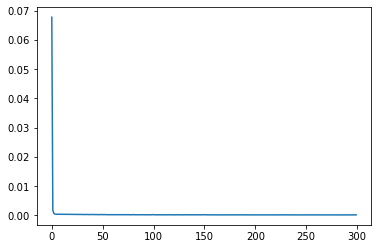

In [16]:
plt.plot(history.history["loss"])

In [17]:
test=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\AMZNtest.csv",parse_dates=["Date"],index_col="Date")
test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400


In [18]:
xtest=test[["Open"]]
xtest

,Open
Date,
2019-01-02,1465.199951
2019-01-03,1520.010010
2019-01-04,1530.000000
2019-01-07,1602.310059
2019-01-08,1664.689941
2019-01-09,1652.979980
2019-01-10,1641.010010
2019-01-11,1640.550049
2019-01-14,1615.000000


In [19]:
sc_xtest=sc.fit_transform(xtest)

In [20]:
sc_xtest

array([[0.        ],
       [0.22208285],
       [0.26256092],
       [0.55555138],
       [0.80830612],
       [0.76085896],
       [0.71235828],
       [0.71049458],
       [0.60696928],
       [0.67585096],
       [0.88743913],
       [0.87034038],
       [1.        ],
       [0.87439225],
       [0.77309567],
       [0.71260113],
       [0.83184768],
       [0.72281191],
       [0.67289318],
       [0.63938419],
       [0.92240673]])

In [21]:
x_test,y_test=feature_transform(n_steps,sc_xtest)

In [22]:
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],1))

### Lets Do the prediction and check performance metrics

In [23]:
y_pred=model.predict(x_test)

In [24]:
y_pred

array([[0.797676  ],
       [0.8818997 ],
       [0.86041373],
       [0.77647364],
       [0.71124893],
       [0.7958966 ],
       [0.7276711 ],
       [0.6757051 ],
       [0.64433056]], dtype=float32)

In [25]:
prediction=sc.inverse_transform(y_pred)

In [26]:
prediction

array([[1662.0664],
       [1682.8529],
       [1677.55  ],
       [1656.8336],
       [1640.7362],
       [1661.6272],
       [1644.7892],
       [1631.964 ],
       [1624.2207]], dtype=float32)

In [27]:
y_test=sc.inverse_transform(y_test.reshape(-1,1))

In [28]:
y_test

array([[1712.      ],
       [1681.      ],
       [1656.      ],
       [1641.069946],
       [1670.5     ],
       [1643.589966],
       [1631.27002 ],
       [1623.      ],
       [1692.849976]])

### Calculate RMSE performance metrics

In [29]:
from sklearn.metrics import mean_squared_error,r2_score 

In [30]:
mse=mean_squared_error(y_test.flatten(),prediction.flatten())
print("MSE is :",mse)
print("RMSE:",np.sqrt(mse))

MSE is : 1043.7797953918057
RMSE: 32.30758108233741


## Create the GRU model

In [31]:
from keras.optimizers import SGD
from keras.layers import Dropout, GRU, Bidirectional
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
history=regressorGRU.fit(x_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
9/9 [==============================] - 19s 91ms/step - loss: 0.1329
Epoch 2/50
9/9 [==============================] - 1s 99ms/step - loss: 0.0577
Epoch 3/50
9/9 [==============================] - 1s 94ms/step - loss: 0.0286
Epoch 4/50
9/9 [==============================] - 1s 93ms/step - loss: 0.0110
Epoch 5/50
9/9 [==============================] - 1s 91ms/step - loss: 0.0055: 0s - loss: 0.0
Epoch 6/50
9/9 [==============================] - 1s 90ms/step - loss: 0.0035
Epoch 7/50
9/9 [==============================] - 1s 94ms/step - loss: 0.0036
Epoch 8/50
9/9 [==============================] - 1s 92ms/step - loss: 0.0032
Epoch 9/50
9/9 [==============================] - 1s 96ms/step - loss: 0.0030
Epoch 10/50
9/9 [==============================] - 1s 105ms/step - loss: 0.0027
Epoch 11/50
9/9 [==============================] - 1s 98ms/step - loss: 0.0030
Epoch 12/50
9/9 [==============================] - 1s 102ms/step - loss: 0.0026
Epoch 13/50
9/9 [=========================

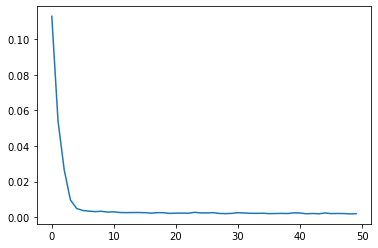

In [32]:
plt.plot(history.history["loss"])

In [44]:
test=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\AMZNtest.csv",parse_dates=["Date"],index_col="Date")
test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400


In [45]:
xtest=test[["Open"]]
xtest

,Open
Date,
2019-01-02,1465.199951
2019-01-03,1520.010010
2019-01-04,1530.000000
2019-01-07,1602.310059
2019-01-08,1664.689941
2019-01-09,1652.979980
2019-01-10,1641.010010
2019-01-11,1640.550049
2019-01-14,1615.000000


In [46]:
sc_xtest=sc.fit_transform(xtest)

In [47]:
x_test,y_test=feature_transform(n_steps,sc_xtest)

In [48]:
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],1))

### Lets Do the prediction and check performance metrics 

In [49]:
y_pred=regressorGRU.predict(x_test)

In [50]:
y_pred

array([[0.6665255 ],
       [0.715446  ],
       [0.75867164],
       [0.79069126],
       [0.803403  ],
       [0.80500734],
       [0.8008125 ],
       [0.789858  ],
       [0.7718718 ]], dtype=float32)

In [51]:
prediction=sc.inverse_transform(y_pred)

In [52]:
y_test=sc.inverse_transform(y_test.reshape(-1,1))

### Calculate RMSE performance metrics

In [53]:
from sklearn.metrics import mean_squared_error,r2_score

In [54]:
mse=mean_squared_error(y_test.flatten(),prediction.flatten())
print("MSE is :",mse)
print("RMSE:",np.sqrt(mse))

MSE is : 1434.8222568365375
RMSE: 37.87904772874494
